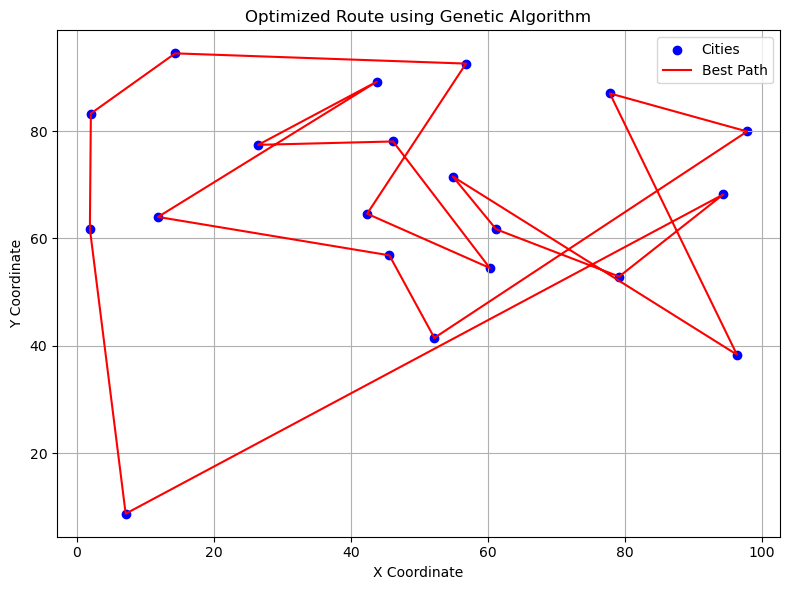

生成的城市座標:
City 1: (54.88, 71.52)
City 2: (60.28, 54.49)
City 3: (42.37, 64.59)
City 4: (43.76, 89.18)
City 5: (96.37, 38.34)
City 6: (79.17, 52.89)
City 7: (56.80, 92.56)
City 8: (7.10, 8.71)
City 9: (2.02, 83.26)
City 10: (77.82, 87.00)
City 11: (97.86, 79.92)
City 12: (46.15, 78.05)
City 13: (11.83, 63.99)
City 14: (14.34, 94.47)
City 15: (52.18, 41.47)
City 16: (26.46, 77.42)
City 17: (45.62, 56.84)
City 18: (1.88, 61.76)
City 19: (61.21, 61.69)
City 20: (94.37, 68.18)
最優路徑: [15 17 13  4 16 12  2  3  7 14  9 18  8 20  6 19  1  5 10 11]
最優路徑長度: 691.0486022062046


In [21]:
import numpy as np
import random
import matplotlib.pyplot as plt

# 參數設置
num_cities = 20  # 城市數量
num_generations = 100  # 迭代次數
population_size = 50  # 種群大小
mutation_rate = 0.01  # 突變率

# 設置隨機種子，用於固定隨機生成的城市座標
np.random.seed(0)
random.seed(0)

# 隨機生成城市坐标
cities = np.random.rand(num_cities, 2) * 100

# 計算城市之間的距離矩陣
def calculate_distance_matrix(cities):
    num_cities = len(cities)
    dist_matrix = np.zeros((num_cities, num_cities))
    for i in range(num_cities):
        for j in range(num_cities):
            if i != j:
                dist_matrix[i, j] = np.linalg.norm(cities[i] - cities[j])
    return dist_matrix

# Fitness 函數：計算路徑總長度作為適應度
def calculate_fitness(population, dist_matrix):
    fitness_scores = np.zeros(len(population))
    for i, individual in enumerate(population):
        total_distance = sum(dist_matrix[individual[j], individual[(j+1) % num_cities]] for j in range(num_cities))
        fitness_scores[i] = 1.0 / total_distance  # 適應度為路徑總長度的倒數，越短越好
    return fitness_scores

# 初始化種群
def initialize_population(population_size, num_cities):
    population = []
    for _ in range(population_size):
        individual = list(range(num_cities))
        random.shuffle(individual)
        population.append(np.array(individual))
    return population

# 選擇操作：輪盤賭選擇
def selection(population, fitness_scores):
    idx = np.random.choice(len(population), size=len(population), p=fitness_scores / fitness_scores.sum())
    return [population[i] for i in idx]

# 交叉操作：順序交叉
def crossover(parent1, parent2):
    child = [-1] * num_cities
    start, end = sorted(random.sample(range(num_cities), 2))
    for i in range(start, end + 1):
        child[i] = parent1[i]
    idx = 0
    for i in range(num_cities):
        if child[i] == -1:
            while parent2[idx] in child:
                idx += 1
            child[i] = parent2[idx]
    return np.array(child)

# 突變操作：交換突變
def mutation(individual):
    if np.random.rand() < mutation_rate:
        idx1, idx2 = random.sample(range(num_cities), 2)
        individual[idx1], individual[idx2] = individual[idx2], individual[idx1]
    return individual

# 遺傳算法主程序
def genetic_algorithm(num_generations, population_size, num_cities, mutation_rate):
    # 初始化城市之間的距離矩陣
    distance_matrix = calculate_distance_matrix(cities)
    
    # 初始化種群
    population = initialize_population(population_size, num_cities)
    
    # 迭代
    best_distances = []
    for generation in range(num_generations):
        # 計算適應度
        fitness_scores = calculate_fitness(population, distance_matrix)
        
        # 選擇
        selected_population = selection(population, fitness_scores)
        
        # 交叉和突變
        next_population = []
        while len(next_population) < population_size:
            parent1, parent2 = random.sample(selected_population, 2)
            child = crossover(parent1, parent2)
            child = mutation(child)
            next_population.append(child)
        
        # 更新種群
        population = next_population
        
        # 記錄每一代的最優解
        best_fitness = np.max(fitness_scores)
        best_distances.append(1.0 / best_fitness)
    
    # 找出最優解
    fitness_scores = calculate_fitness(population, distance_matrix)
    best_idx = np.argmax(fitness_scores)
    best_individual = population[best_idx]
    best_distance = 1.0 / fitness_scores[best_idx]  # 最優路徑的長度
    
    # 繪製結果
    plot_results(cities, best_individual)
    
    return best_individual, best_distance

# 繪製城市和最優路徑
def plot_results(cities, best_individual):
    plt.figure(figsize=(8, 6))
    
    # 繪製城市
    plt.scatter(cities[:, 0], cities[:, 1], marker='o', color='blue', label='Cities')
    
    # 繪製最優路徑
    ordered_cities = cities[best_individual]
    ordered_cities = np.concatenate((ordered_cities, [ordered_cities[0]]))  # 連接回起點
    plt.plot(ordered_cities[:, 0], ordered_cities[:, 1], linestyle='-', color='red', linewidth=1.5, label='Best Path')
    
    plt.title('Optimized Route using Genetic Algorithm')
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# 執行遺傳算法並輸出結果
best_path, best_length = genetic_algorithm(num_generations, population_size, num_cities, mutation_rate)

print("生成的城市座標:")
for i, (x, y) in enumerate(cities):
    print(f"City {i+1}: ({x:.2f}, {y:.2f})")
formatted_best_path = best_path + 1
print("最優路徑:", formatted_best_path)
print("最優路徑長度:", best_length)